#  **reading the data**. 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
df1 = pd.read_csv("/kaggle/input/nti-r-1-beyond/train.csv")
df2 = pd.read_csv("/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv")  # Assuming same filename
df1.columns = df1.columns.str.lower()  
df2.columns = df2.columns.str.lower()
combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
df_test=pd.read_csv("/kaggle/input/nti-r-1-beyond/test.csv")
df_test.columns = df_test.columns.str.lower()  

print(f"df1 shape: {df1.shape}")
print(f"df2 shape: {df2.shape}")
print(f"combined_df shape: {combined_df.shape}")

df1 shape: (15000, 20)
df2 shape: (418, 20)
combined_df shape: (15418, 20)


In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15418 non-null  int64  
 1   n_days         15418 non-null  float64
 2   drug           8792 non-null   object 
 3   age            15418 non-null  float64
 4   sex            15418 non-null  object 
 5   ascites        8795 non-null   object 
 6   hepatomegaly   8780 non-null   object 
 7   spiders        8778 non-null   object 
 8   edema          15418 non-null  object 
 9   bilirubin      15418 non-null  float64
 10  cholesterol    6867 non-null   float64
 11  albumin        15418 non-null  float64
 12  copper         8674 non-null   float64
 13  alk_phos       8777 non-null   float64
 14  sgot           8777 non-null   float64
 15  tryglicerides  6815 non-null   float64
 16  platelets      14812 non-null  float64
 17  prothrombin    15393 non-null  float64
 18  stage 

# **feauter Engineering & EDA**

In [4]:
cat=['drug','ascites','hepatomegaly','spiders','sex','edema','status']


In [5]:
df_eng = combined_df.copy()
df_engtest=df_test.copy()


In [6]:
df_engtest

,id,n_days,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,15000,824.0,Placebo,16154.0,F,N,Y,Y,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,13.2,4.0
1,15001,1095.0,NaN,23376.0,F,NaN,NaN,NaN,N,1.8,NaN,3.15,NaN,NaN,NaN,NaN,384.0,10.3,2.0
2,15002,2598.0,D-penicillamine,16300.0,F,N,Y,N,N,3.4,393.0,3.40,50.0,1020.0,103.85,103.0,207.0,9.8,3.0
3,15003,2944.0,D-penicillamine,18176.0,F,N,Y,N,N,0.9,346.0,3.37,59.0,1098.0,125.55,126.0,122.0,10.1,2.0
4,15004,597.0,NaN,23011.0,F,NaN,NaN,NaN,N,2.1,NaN,3.24,NaN,NaN,NaN,NaN,165.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,2202.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.8,NaN,2.93,NaN,NaN,NaN,NaN,166.0,10.4,4.0
9996,24996,4025.0,D-penicillamine,21904.0,F,N,N,N,N,0.6,NaN,3.91,31.0,911.0,56.76,NaN,324.0,10.6,2.0
9997,24997,2267.0,NaN,14975.0,F,NaN,NaN,NaN,N,5.4,NaN,3.31,NaN,NaN,NaN,NaN,76.0,10.4,2.0
9998,24998,1086.0,NaN,18628.0,F,NaN,NaN,NaN,N,2.8,NaN,3.58,NaN,NaN,NaN,NaN,274.0,10.6,3.0


In [7]:
df_eng['n_years']=df_eng['n_days']/365
df_engtest['n_years']=df_engtest['n_days']/365

In [8]:
df_eng['age_years']=df_eng['age']/365
df_engtest['age_years']=df_engtest['age']/365

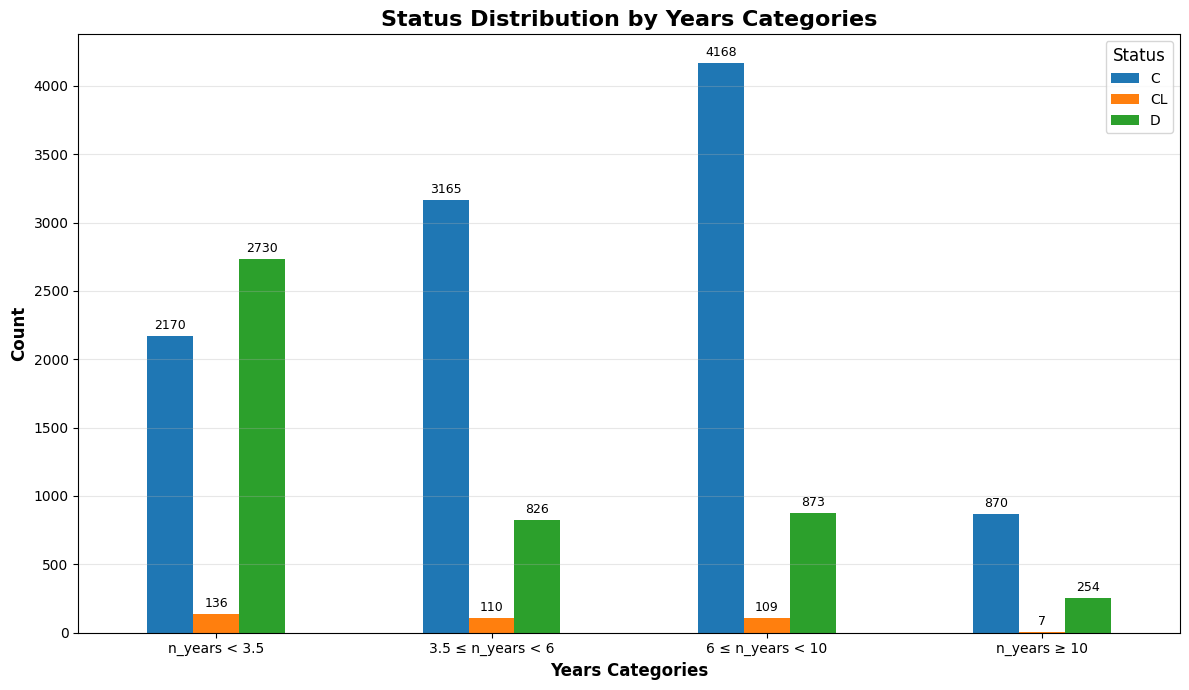

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_eng['n_years_category'] = pd.cut(
    df_eng['n_years'],
    bins=[-np.inf, 3.5, 6, 10, np.inf],
    labels=['n_years < 3.5', '3.5 ≤ n_years < 6', '6 ≤ n_years < 10','n_years ≥ 10'],
    right=False
)
df_engtest['n_years_category'] = pd.cut(
    df_engtest['n_years'],
    bins=[-np.inf, 3.5, 6, 10, np.inf],
    labels=['n_years < 3.5', '3.5 ≤ n_years < 6', '6 ≤ n_years < 10','n_years ≥ 10'],
    right=False
)
cross_tab = pd.crosstab(df_eng['n_years_category'], df_eng['status'])

plt.figure(figsize=(12, 7))
bars = cross_tab.plot(kind='bar', ax=plt.gca())

plt.title('Status Distribution by Years Categories', fontsize=16, fontweight='bold')
plt.xlabel('Years Categories', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Status', title_fontsize=12, fontsize=10)
plt.xticks(rotation=0)  # Horizontal labels for better readability
plt.grid(axis='y', alpha=0.3)

for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

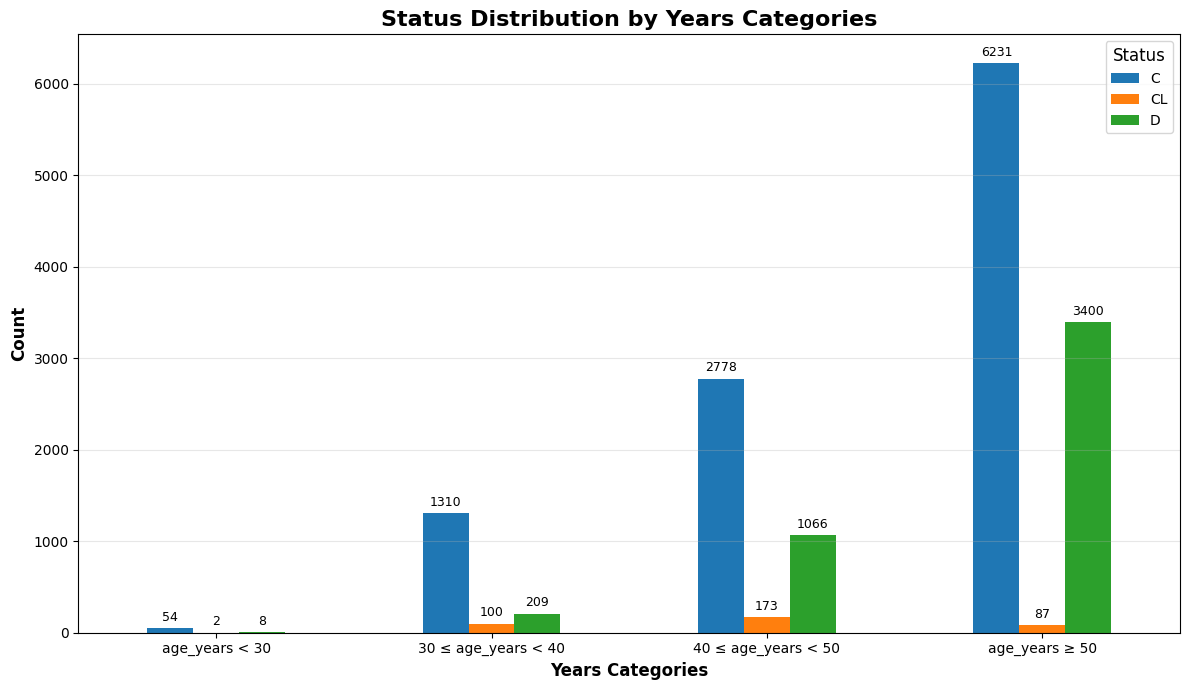

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_eng['age_years_category'] = pd.cut(
    df_eng['age_years'],
    bins=[-np.inf, 30, 40, 50, np.inf],
    labels=['age_years < 30', '30 ≤ age_years < 40', '40 ≤ age_years < 50','age_years ≥ 50'],
    right=False
)
df_engtest['age_years_category'] = pd.cut(
    df_engtest['age_years'],
    bins=[-np.inf, 30, 40, 50, np.inf],
    labels=['age_years < 30', '30 ≤ age_years < 40', '40 ≤ age_years < 50','age_years ≥ 50'],
    right=False
)
cross_tab = pd.crosstab(df_eng['age_years_category'], df_eng['status'])

plt.figure(figsize=(12, 7))
bars = cross_tab.plot(kind='bar', ax=plt.gca())

plt.title('Status Distribution by Years Categories', fontsize=16, fontweight='bold')
plt.xlabel('Years Categories', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Status', title_fontsize=12, fontsize=10)
plt.xticks(rotation=0)  # Horizontal labels for better readability
plt.grid(axis='y', alpha=0.3)

for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

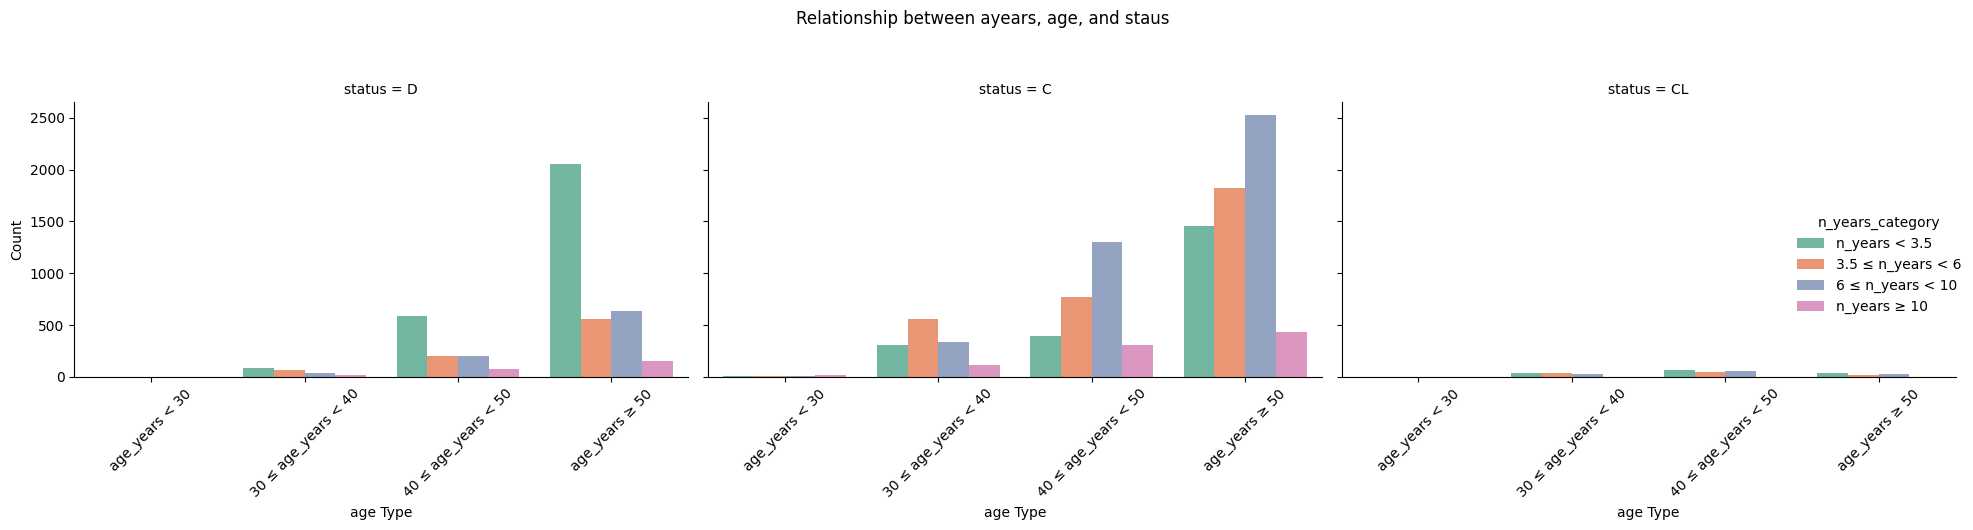

In [11]:
g = sns.catplot(data=df_eng, x='age_years_category', hue='n_years_category', col='status',
                kind='count', palette='Set2', height=5, aspect=1.2)
g.fig.suptitle('Relationship between ayears, age, and staus', y=1.05)
g.set_axis_labels('age Type', 'Count')
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

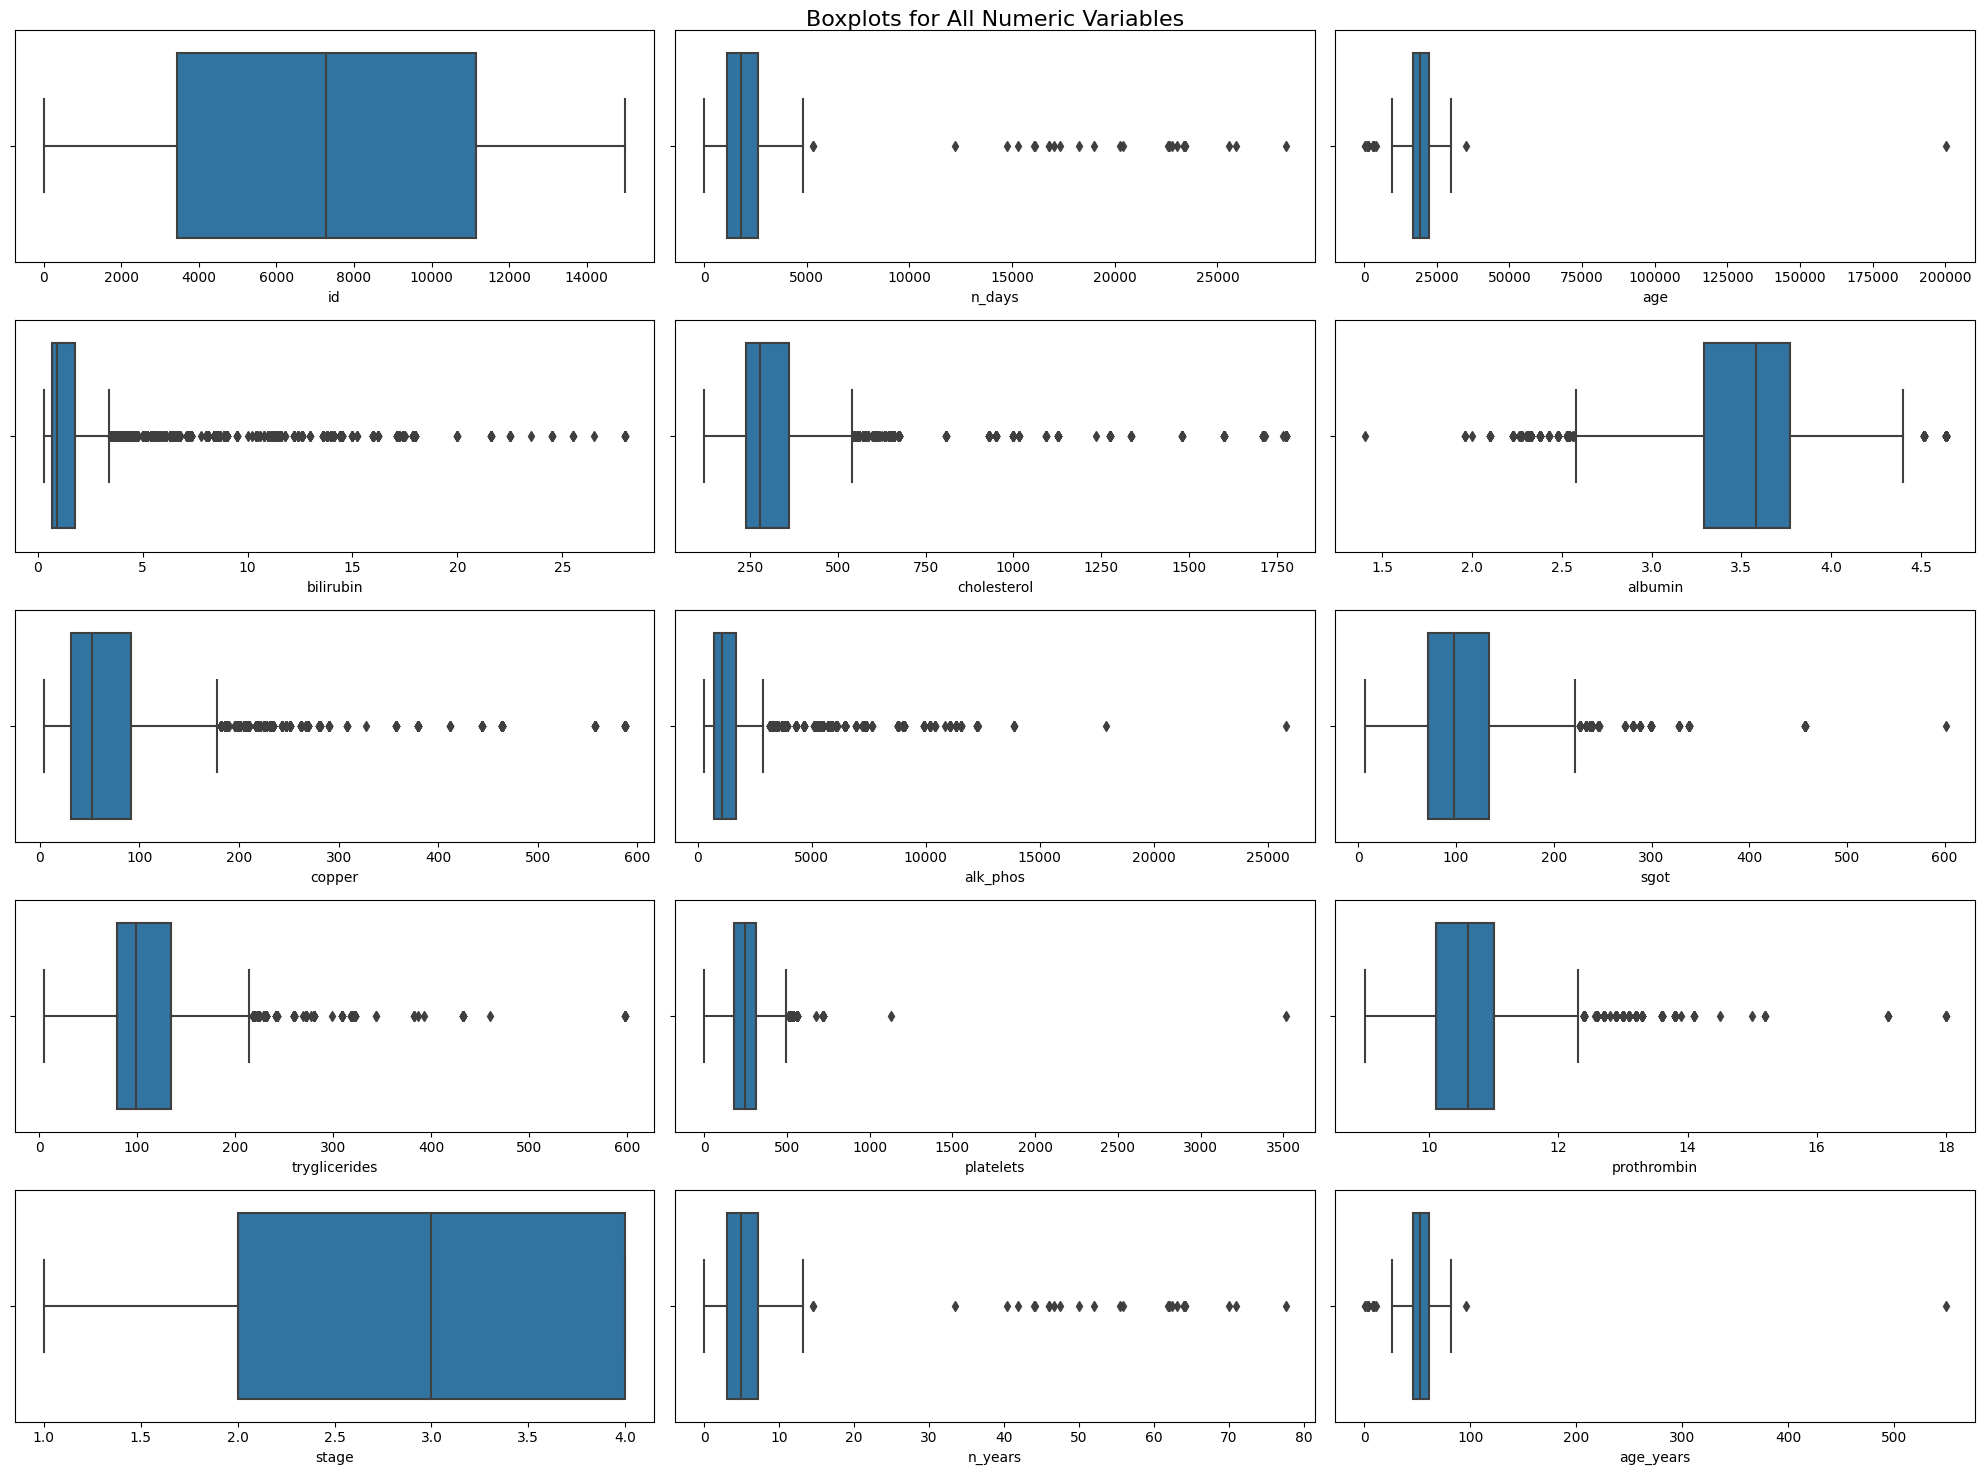

In [12]:
n_cols = 3  
numeric_df = df_eng.select_dtypes(include=['int64', 'float64'])
n_rows = (len(numeric_df.columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15)) 
axes = axes.flatten() 

for i, column in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[column], ax=axes[i])  

plt.suptitle('Boxplots for All Numeric Variables', fontsize=16)
plt.tight_layout()  
plt.show()

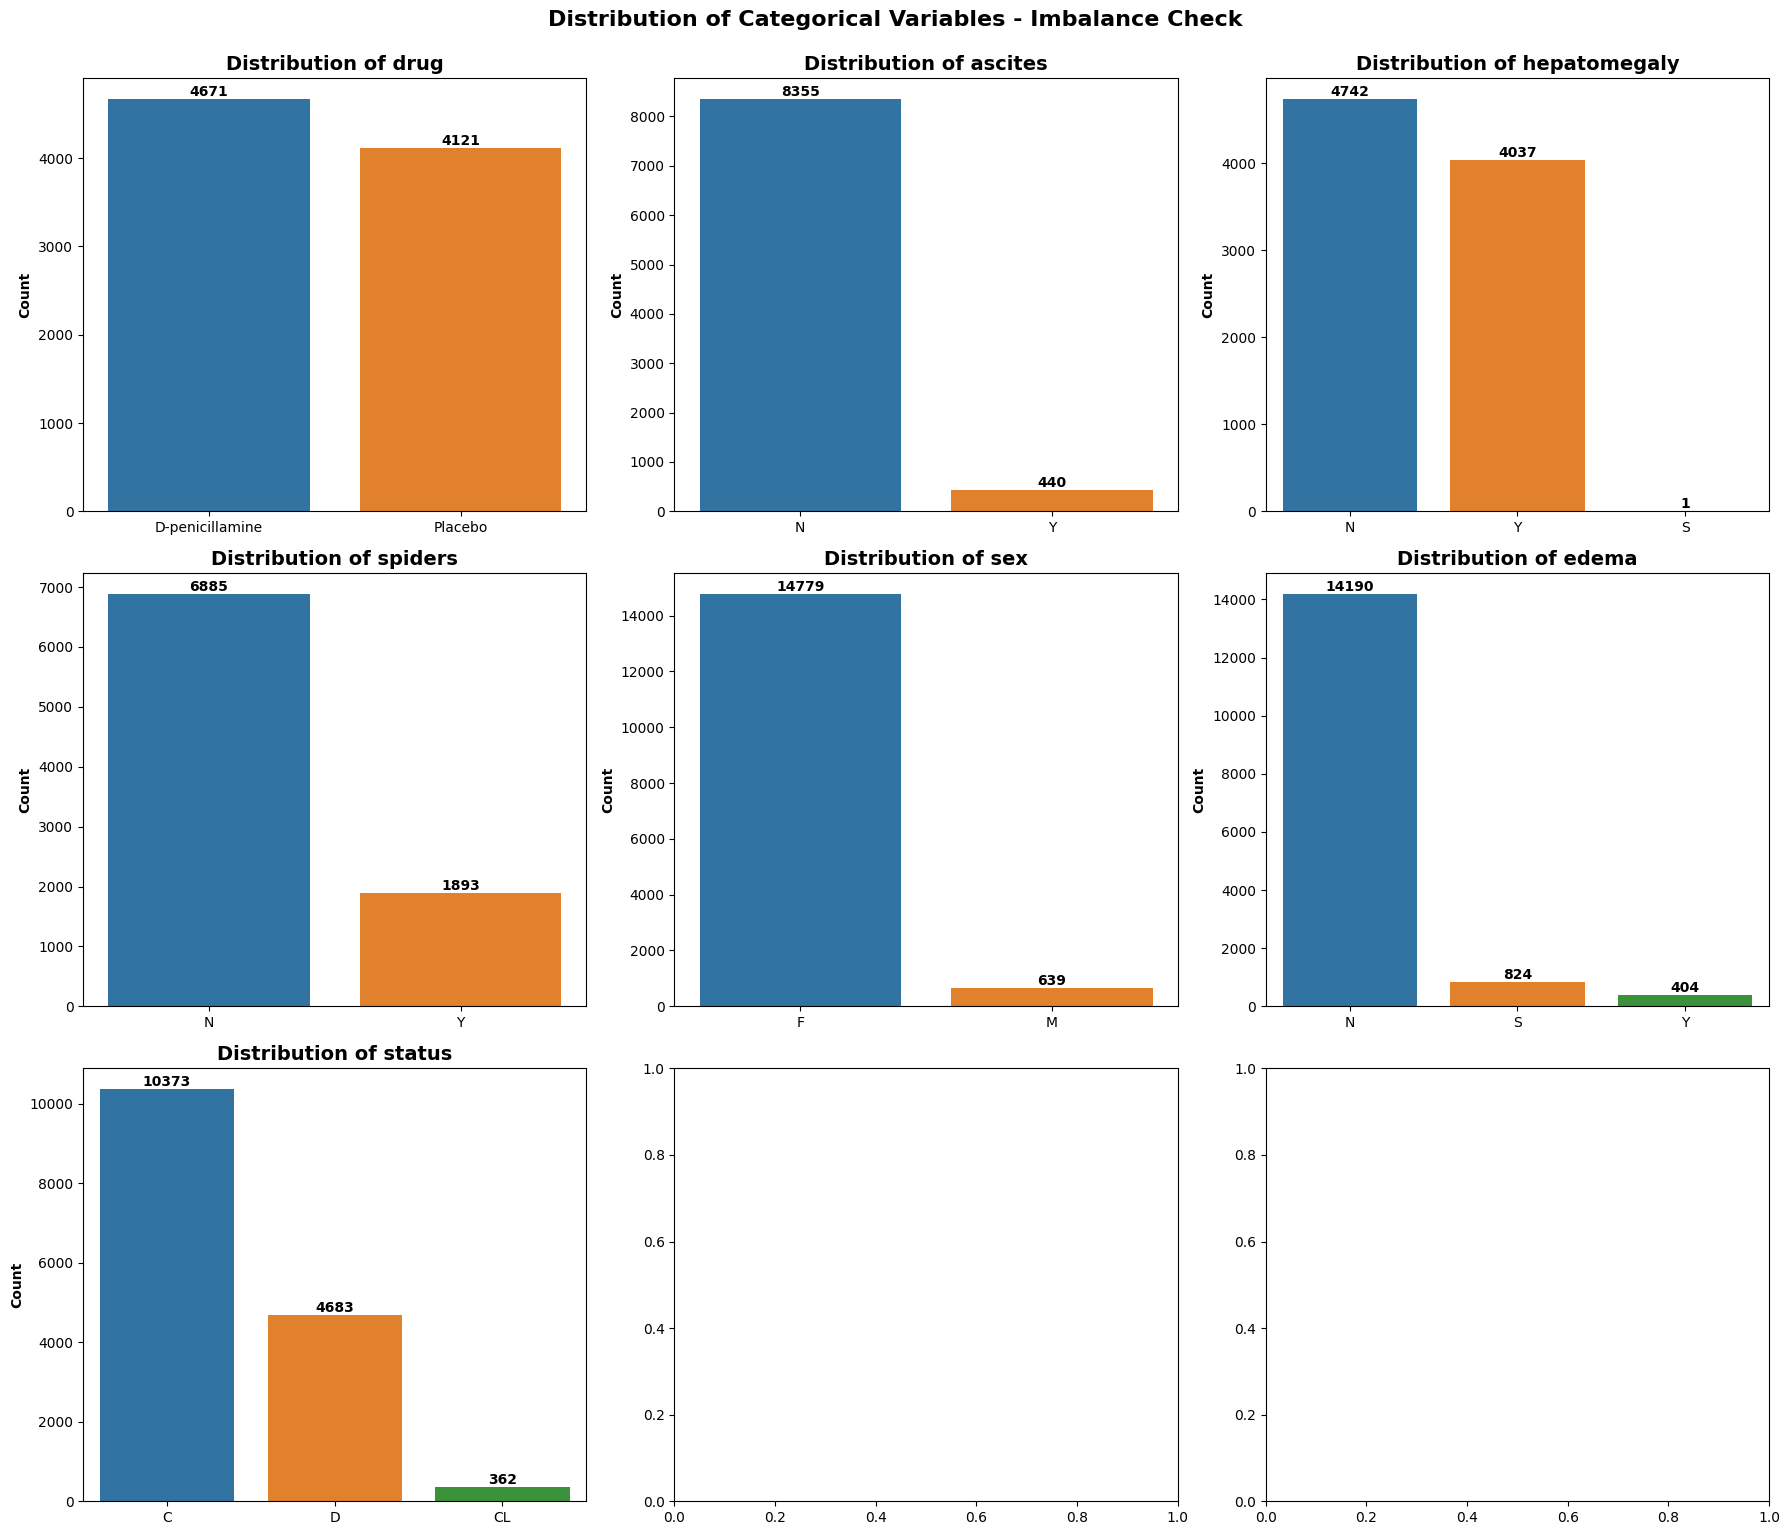

In [13]:

fig, axes = plt.subplots(3, 3, figsize=(18, 15))  
axes = axes.flatten()

for i, col in enumerate(cat):
    value_counts = df_eng[col].value_counts()
    
    sns.countplot(x=df_eng[col], ax=axes[i], order=value_counts.index)
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontweight='bold')
    
    
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height:.0f}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', 
                        fontsize=10, fontweight='bold')
    
    
plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables - Imbalance Check', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()



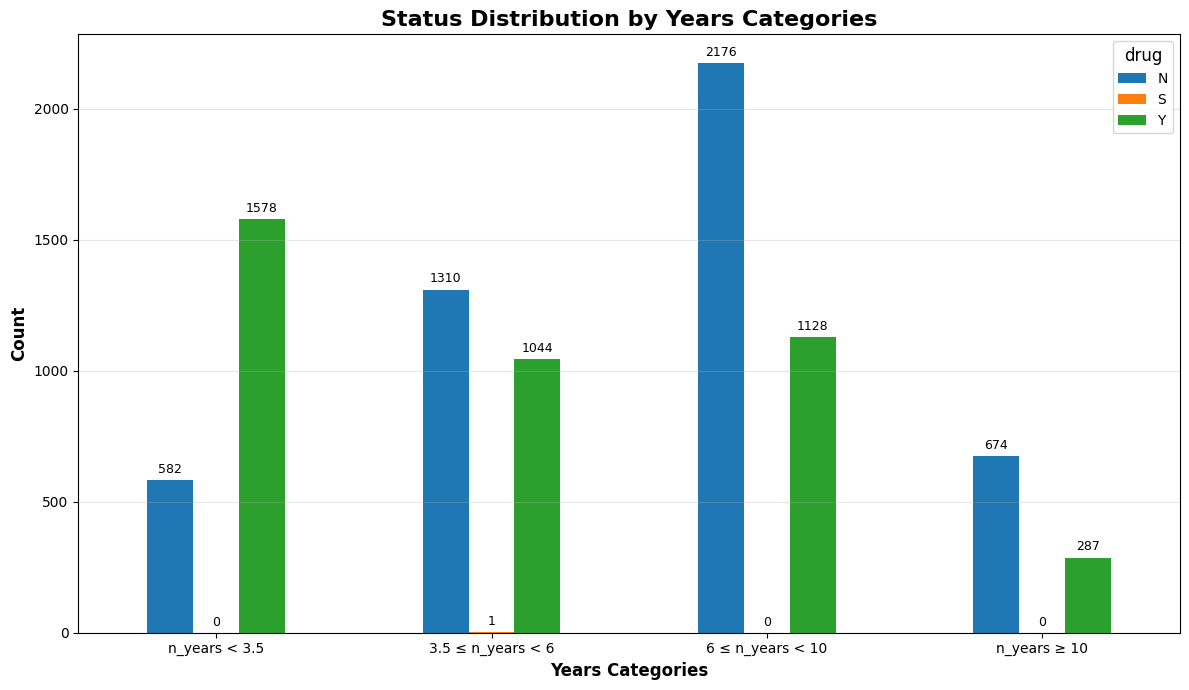

In [14]:

cross_tab = pd.crosstab(df_eng['n_years_category'], df_eng['hepatomegaly'])

# 3. Plot as bar chart
plt.figure(figsize=(12, 7))
bars = cross_tab.plot(kind='bar', ax=plt.gca())

plt.title('Status Distribution by Years Categories', fontsize=16, fontweight='bold')
plt.xlabel('Years Categories', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='drug', title_fontsize=12, fontsize=10)
plt.xticks(rotation=0)  # Horizontal labels for better readability
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

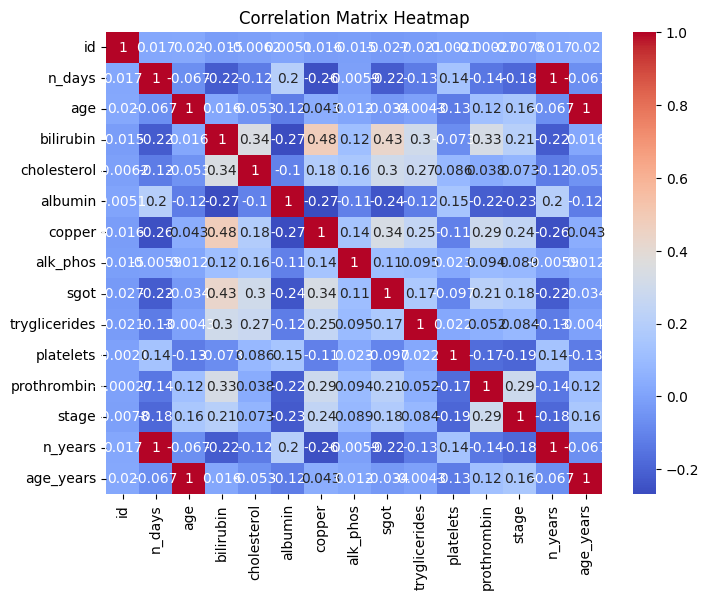

In [15]:
numeric_df = df_eng.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6)) # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
if df_eng['hepatomegaly'].isnull().any():
    mask = (df_eng['n_years_category'] == 'n_years < 3.5') & (df_eng['hepatomegaly'].isnull())
    df_eng.loc[mask, 'hepatomegaly'] = 'Y'
    other_mask = (df_eng['n_years_category'] != 'n_years < 3.5') & (df_eng['hepatomegaly'].isnull())
    if other_mask.any():
        mode_value = df_eng['hepatomegaly'].mode()[0] 
        df_eng.loc[other_mask, 'hepatomegaly'] = mode_value

In [17]:
if df_engtest['hepatomegaly'].isnull().any():
    mask = (df_engtest['n_years_category'] == 'n_years < 3.5') & (df_engtest['hepatomegaly'].isnull())
    df_engtest.loc[mask, 'hepatomegaly'] = 'Y'
    other_mask = (df_engtest['n_years_category'] != 'n_years < 3.5') & (df_engtest['hepatomegaly'].isnull())
    if other_mask.any():
        mode_value = df_engtest['hepatomegaly'].mode()[0] 
        df_engtest.loc[other_mask, 'hepatomegaly'] = mode_value

In [18]:
df_eng=df_eng.drop(['n_days','age','n_years_category','age_years_category'],axis=1)

In [19]:
df_engtest=df_engtest.drop(['n_days','age','n_years_category','age_years_category'],axis=1)

In [20]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15418 non-null  int64  
 1   drug           8792 non-null   object 
 2   sex            15418 non-null  object 
 3   ascites        8795 non-null   object 
 4   hepatomegaly   15418 non-null  object 
 5   spiders        8778 non-null   object 
 6   edema          15418 non-null  object 
 7   bilirubin      15418 non-null  float64
 8   cholesterol    6867 non-null   float64
 9   albumin        15418 non-null  float64
 10  copper         8674 non-null   float64
 11  alk_phos       8777 non-null   float64
 12  sgot           8777 non-null   float64
 13  tryglicerides  6815 non-null   float64
 14  platelets      14812 non-null  float64
 15  prothrombin    15393 non-null  float64
 16  stage          15412 non-null  float64
 17  status         15418 non-null  object 
 18  n_year

In [21]:
df_eng

,id,drug,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,status,n_years,age_years
0,0,NaN,F,NaN,Y,NaN,N,2.1,NaN,3.63,NaN,NaN,NaN,NaN,388.0,10.5,4.0,D,4.783562,54.038356
1,1,Placebo,F,N,Y,N,N,0.6,296.0,4.20,37.0,1758.0,106.95,85.0,336.0,10.6,3.0,C,7.800000,48.652055
2,2,Placebo,F,N,N,N,N,0.7,217.0,3.85,39.0,794.0,93.00,68.0,336.0,10.1,1.0,C,11.594521,55.430137
3,3,NaN,F,NaN,Y,NaN,N,0.7,NaN,3.58,NaN,NaN,NaN,NaN,189.0,10.9,4.0,C,6.950685,62.043836
4,4,Placebo,M,N,Y,N,N,2.8,NaN,3.60,94.0,1276.0,151.90,NaN,344.0,11.0,4.0,C,8.487671,46.701370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15413,414,NaN,F,NaN,Y,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D,1.865753,67.046575
15414,415,NaN,F,NaN,Y,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C,3.021918,39.027397
15415,416,NaN,F,NaN,Y,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C,2.890411,57.038356
15416,417,NaN,F,NaN,Y,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C,1.893151,58.041096


In [22]:
df_engtest

,id,drug,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,n_years,age_years
0,15000,Placebo,F,N,Y,Y,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,13.2,4.0,2.257534,44.257534
1,15001,NaN,F,NaN,Y,NaN,N,1.8,NaN,3.15,NaN,NaN,NaN,NaN,384.0,10.3,2.0,3.000000,64.043836
2,15002,D-penicillamine,F,N,Y,N,N,3.4,393.0,3.40,50.0,1020.0,103.85,103.0,207.0,9.8,3.0,7.117808,44.657534
3,15003,D-penicillamine,F,N,Y,N,N,0.9,346.0,3.37,59.0,1098.0,125.55,126.0,122.0,10.1,2.0,8.065753,49.797260
4,15004,NaN,F,NaN,Y,NaN,N,2.1,NaN,3.24,NaN,NaN,NaN,NaN,165.0,11.0,4.0,1.635616,63.043836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,NaN,F,NaN,Y,NaN,N,0.8,NaN,2.93,NaN,NaN,NaN,NaN,166.0,10.4,4.0,6.032877,63.043836
9996,24996,D-penicillamine,F,N,N,N,N,0.6,NaN,3.91,31.0,911.0,56.76,NaN,324.0,10.6,2.0,11.027397,60.010959
9997,24997,NaN,F,NaN,Y,NaN,N,5.4,NaN,3.31,NaN,NaN,NaN,NaN,76.0,10.4,2.0,6.210959,41.027397
9998,24998,NaN,F,NaN,Y,NaN,N,2.8,NaN,3.58,NaN,NaN,NaN,NaN,274.0,10.6,3.0,2.975342,51.035616


# **transformation & Fixing the data**

In [23]:

df_clean = df_eng.copy()

df_cleantest = df_engtest.copy()

df_clean.set_index('id', inplace=True)
df_cleantest.set_index('id', inplace=True)


categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols2 = df_cleantest.select_dtypes(include=['object']).columns.tolist()


for column in categorical_cols:
    le = LabelEncoder()
    
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
for column in categorical_cols2:
    le = LabelEncoder()
    
    df_cleantest[column] = le.fit_transform(df_cleantest[column].astype(str))
    

In [24]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols

[]

In [25]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15418 non-null  int64  
 1   drug           8792 non-null   object 
 2   sex            15418 non-null  object 
 3   ascites        8795 non-null   object 
 4   hepatomegaly   15418 non-null  object 
 5   spiders        8778 non-null   object 
 6   edema          15418 non-null  object 
 7   bilirubin      15418 non-null  float64
 8   cholesterol    6867 non-null   float64
 9   albumin        15418 non-null  float64
 10  copper         8674 non-null   float64
 11  alk_phos       8777 non-null   float64
 12  sgot           8777 non-null   float64
 13  tryglicerides  6815 non-null   float64
 14  platelets      14812 non-null  float64
 15  prothrombin    15393 non-null  float64
 16  stage          15412 non-null  float64
 17  status         15418 non-null  object 
 18  n_year

In [26]:
from sklearn.impute import KNNImputer

X_train = df_clean.drop('status', axis=1)  
y_train = df_clean['status'] 

X_test = df_cleantest  

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

X_train_imputed_array = knn_imputer.fit_transform(X_train)

X_train_imputed = pd.DataFrame(X_train_imputed_array, columns=X_train.columns, index=X_train.index)

X_test_imputed_array = knn_imputer.transform(X_test)

X_test_imputed = pd.DataFrame(X_test_imputed_array, columns=X_test.columns, index=X_test.index)

df_imputed = pd.concat([X_train_imputed, y_train], axis=1)
df_imputed2 = X_test_imputed  

In [27]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15418 entries, 0 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drug           15418 non-null  float64
 1   sex            15418 non-null  float64
 2   ascites        15418 non-null  float64
 3   hepatomegaly   15418 non-null  float64
 4   spiders        15418 non-null  float64
 5   edema          15418 non-null  float64
 6   bilirubin      15418 non-null  float64
 7   cholesterol    15418 non-null  float64
 8   albumin        15418 non-null  float64
 9   copper         15418 non-null  float64
 10  alk_phos       15418 non-null  float64
 11  sgot           15418 non-null  float64
 12  tryglicerides  15418 non-null  float64
 13  platelets      15418 non-null  float64
 14  prothrombin    15418 non-null  float64
 15  stage          15418 non-null  float64
 16  n_years        15418 non-null  float64
 17  age_years      15418 non-null  float64
 18  status       

# **Modeling**

In [28]:
X_train = df_imputed.drop('status', axis=1)  
y_train = df_imputed['status']  

In [29]:

model = xgb.XGBClassifier(
    objective='binary:logistic',  
    n_estimators=200,            
    learning_rate=0.0001,           
    max_depth=6,                 
    random_state=42,             
    use_label_encoder=False      
)

model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [30]:
y_pred_proba = model.predict_proba(df_imputed2)



# **submission file**

In [31]:
submission_df = pd.DataFrame()

if 'id' in df_engtest.columns:
    submission_df['id'] = df_engtest['id'].values

print("Model classes:", model.classes_)

class_mapping = {
    0: 'Status_C',
    1: 'Status_CL', 
    2: 'Status_D'
}

for i in range(3):
    submission_df[class_mapping[i]] = y_pred_proba[:, i]

expected_columns = ['id', 'Status_C', 'Status_CL', 'Status_D']
submission_df = submission_df[expected_columns]

submission_df[['Status_C', 'Status_CL', 'Status_D']] = submission_df[['Status_C', 'Status_CL', 'Status_D']].clip(1e-15, 1-1e-15)

print("First 5 rows of submission:")
print(submission_df.head())
print("\nProbability sums for first 5 rows:")
print(submission_df[['Status_C', 'Status_CL', 'Status_D']].sum(axis=1).head())

submission_df.to_csv("submission2.csv", index=False)
print("\nSubmission file saved as 'submission.csv'")

Model classes: [0 1 2]
First 5 rows of submission:
      id  Status_C  Status_CL  Status_D
0  15000  0.327756   0.330290  0.341954
1  15001  0.339570   0.328044  0.332387
2  15002  0.336270   0.329845  0.333885
3  15003  0.342256   0.328190  0.329554
4  15004  0.328638   0.328489  0.342874

Probability sums for first 5 rows:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float32

Submission file saved as 'submission.csv'


In [32]:
final_check=pd.read_csv('/kaggle/working/submission2.csv')
final_check

,id,Status_C,Status_CL,Status_D
0,15000,0.327756,0.330290,0.341954
1,15001,0.339570,0.328044,0.332387
2,15002,0.336270,0.329845,0.333885
3,15003,0.342256,0.328190,0.329554
4,15004,0.328638,0.328489,0.342873
...,...,...,...,...
9995,24995,0.339233,0.328493,0.332274
9996,24996,0.342600,0.328520,0.328880
9997,24997,0.336106,0.332170,0.331724
9998,24998,0.338378,0.328040,0.333582


In [33]:
from IPython.display import FileLink
import pandas as pd

final_check = pd.read_csv('/kaggle/working/submission2.csv')
print("File loaded from /kaggle/working/")

FileLink(r'submission.csv')

File loaded from /kaggle/working/


/kaggle/working/submission.csv